In [66]:
import TreeWorld
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from matplotlib.colors import LogNorm, Normalize
from scipy import stats
import figures 
import gridworld_utils as util
from importlib import reload
import time
reload(util)
reload(figures)
reload(TreeWorld)


<module 'TreeWorld' from 'c:\\Users\\admin\\Dropbox\\Code\\Basis-code\\collaborative-intelligence\\TreeWorld.py'>

We are going to walk through a multi-agent foraging model. This is sandbox for specifying a family of multi-agent foraging problems. I will show you what parameters you can tune and what the resulting behavior looks like. 

#Part 1: Environment

The basic setup is a discrete 2-dimensional grid world with dimensions edge_size x edge_size. It is an open environment with no obstacles. The minimal constraints in this environment are the spatiotemporal statistics of food rewards. In this section we will visualize and play with different parameters that control these spatiotemporal statistics.

Let's start with spatial statistics. It is assumed that food comes in square patches of dimension patch_dim x patch_dim. The main variables that we can tune are 
* N_food_units_total: the total number of food units in the environment 
* patch_dim: dimension of a single square food patch. Given a fixed value for N_food_units_total, the patch_dim parameter effectively controls how clustered and distributed the patches of food are. 
Play around with these two parameters. 

In [60]:
edge_size = 30 # grid world has dimensions edge_size x edge_size
x_arr, y_arr, _ = util.create_2Dgrid(edge_size) # fetch the x and y coordinates of each grid location 

Now let's consider temporal statistics. We're going to assume food rewards appear with Poisson statistics. We will specify a rate of appearance. 
* PARAMETER: 

Part 2: Anatomy of a bird agent 

Now that you've had a chance to play with the environment, let's add in the birds!
For this part, I will walk you through the internals of a bird agent step by step. A bird agent consists of the following: 
1) State - the agent's current location in the grid. 
2) World Model - a world model generates predictions of where the agent thinks there will be reward in the future. The main parts of the world model are the 
    * Transition matrix T 
    * Temporal discount factor gamma 
    * Successor Representation matrix M
In a few sections, I will explain what each of these variables are.   
3) Value function - this function is a mapping from state (i.e. location) to value. Applying this function to all locations results in a vector of values for each location. We will visualize this as a 2-dimensional heatmap of our grid world where the color represents the value at a given location. 
4) Policy - a function mapping from a state to action, specifically from the agent's current location to a next location. I have implemented both a deterministic and a probabilistic version of this policy. The deterministic policy is simply a greedy one - choose the location of maximum value. The probabilistic version uses a softmax function that takes as input an array of values corresponding to each eligible location and returns an array of probabilities for each eligible location. The policy then samples from the eligible locations according to those probabilities. 


2.1 State

2.2 World Model (Reward prediction)

2.3 Value Function 

2.4 Policy Function 

Part 3: Simulating different multi-agent behaviors

In the previous sections, we walked through different types of food statistics and the internals of a bird agent. Now we will put these pieces together and simulate multiple agents foraging in the same environment. The goal of this section is to understand how changing the value function of these agents changes their collective behavior. 

I'm going to show you a few types of agent "species" defined by their value function. The difference between each species is the weight they assign to different sources of reward: 
1) Ignorers - These agents only care about food. Reward increases with proximity to food. 
2) Avoiders - Assign negative reward to locations based on proximity to another bird. 
3) Followers - Assign positive reward to locations based on proximity to another bird.  
4) Communicators - Use information about food from other birds. They can see the food reward at locations occupied by other agents. 

We are going to assume XXX food statistics and focus on varying the internals of the value function.

3.1 Ignorers 

In [61]:
# Set feature weights for the value function
c_food = 1
c_otheragents = 0
c_group = 0
c_weights = [c_food, c_otheragents, c_group]
# Set other parameters 
doShareFoodInfo = False
max_step_size = 3
sight_radius = 50
energy_init = 50
discount_factor = 0.9
caloric_cost_per_unit_dist = 1
doProbabilisticPolicy = True
doSoftmaxPolicy = True
exploration_bias = 0.001

# *** Functions ****
# initialize_environment(edge_size, patch_dim, N_food_units_total)
# 
# for each agent: 
#   initialize_agent(param_list)
#       T = build_transition_matrix(max_step_size, N_states)
# 
# for each time step t:
#   update_environment()
#   
#   for each agent:
#        agent.update_calories
#        compute features
#        select_action  
        

3.3 Followers

3.4 Communicators

Conclusion 

I hope that this tutorial has helped you understand how we can build a variety of multi-bird foraging systems.  
The long-term goal is to be able to do inference on this kind of model. The parameters in the value function are of most interest because they control what the agent cares about which ultimately influences their decisions. So the goal of inference would be to estimate the values of the weights for each factor in the value function. What makes this model unique is that the way we express the value function is 1) interpretable in terms of cognitive and neural mechanisms, and 2) has a statistical interpretation - inference of the feature weights amounts to Bayesian linear regression. For more details on the link between cognitive/neural and statistical descriptions, I encourage you to visit our manuscript (ask Emily or Marjorie for the pdf). 

Extensions and future directions
* This model can easily be extended by adding new features to the value function. We haven't considered predators yet.
* Energy constraints have yet to be incorporated into the value function. One of the key scientific questions Collaborative Intelligence is interested in asks, under what resource constraints and environmental constraints is social behavior advantageous? Birds in the real world have an internal representation of how costly certain situations will be...... [THINK MORE ABOUT HOW TO INCOPORATE THIS INTO THE MODEL]

Now let's define the transition function - what locations are eligible given the bird agent's current location. We will use a Euclidean distance rule, where all locations within a certain radius MAX_STEP_SIZE 

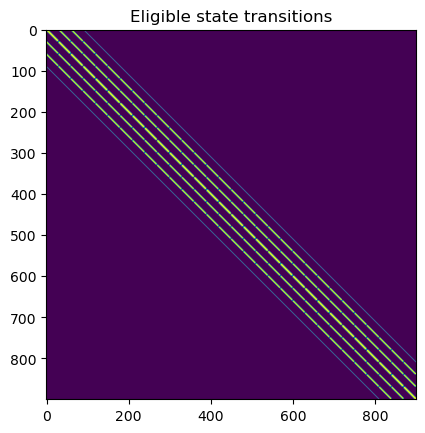

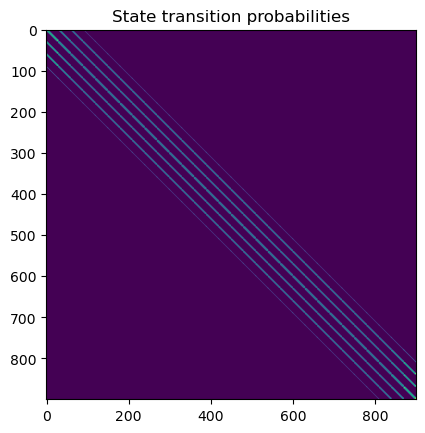

In [67]:

environment = TreeWorld.Environment()

plt.figure()
plt.title('Eligible state transitions')
plt.imshow(environment.T_eligible)

plt.figure()
plt.title('State transition probabilities')
plt.imshow(environment.T_prob)